In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#Download all necessary data
df2014 = pd.read_csv('./developer_survey_2014/2014 Stack Overflow Survey Responses.csv', low_memory=False)
df2015 = pd.read_csv('./developer_survey_2015/2015 Stack Overflow Developer Survey Responses.csv', header=1, low_memory=False)
df2016 = pd.read_csv('./developer_survey_2016/2016 Stack Overflow Survey Responses.csv', low_memory=False)
df2017 = pd.read_csv('./developer_survey_2017/survey_results_public.csv', low_memory=False)
df2018 = pd.read_csv('./developer_survey_2018/survey_results_public.csv', low_memory=False)
df2019 = pd.read_csv('./developer_survey_2019/survey_results_public.csv', low_memory=False)
df2020 = pd.read_csv('./developer_survey_2020/survey_results_public.csv', low_memory=False)



### Academic degree distribution among the respondents for 2017-2020
The objective is to calculate the yearly percentage of people working in the field who belong to different educational levels.

Bachelor's degree                                                    42.047400
Master's degree                                                      21.678471
Some college/university study without earning a bachelor's degree    15.817637
Secondary school                                                     11.495953
Doctoral degree                                                       2.545143
I prefer not to answer                                                2.157923
Primary/elementary school                                             2.037282
Professional degree                                                   1.391267
I never completed any formal education                                0.828923
Name: 2017, dtype: float64


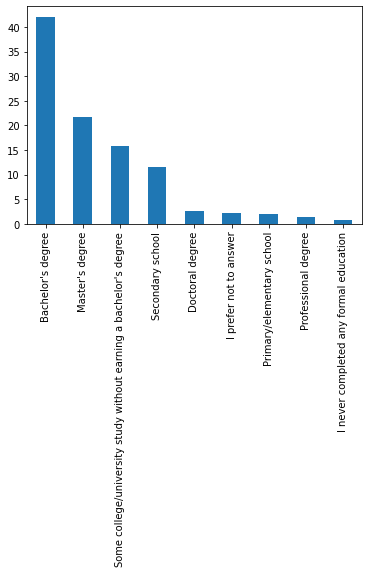

In [367]:
df2017_cleared = df2017['FormalEducation'].dropna()
df2017_cleared = df2017_cleared.value_counts()
df2017_cleared = df2017_cleared/df2017_cleared.sum()
df2017_cleared.name = '2017'
df2017_cleared = df2017_cleared * 100
print(df2017_cleared)

df2017_cleared.plot(kind='bar')

In [368]:
#Mapping to insure uniformity of data
degree_mapping = {'Bachelor’s degree (BA, BS, B.Eng., etc.)': "Bachelor's degree",
                 'Master’s degree (MA, MS, M.Eng., MBA, etc.)': "Master's degree",
                 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                 'Professional degree (JD, MD, etc.)': 'Professional degree', 
                 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's degree",                                       
                 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's degree",                                          
                 'Associate degree (A.A., A.S., etc.)': 'Associate degree',
                 'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
                 'Some college/university study without earning a degree': "Some college/university study without earning a bachelor's degree"}

Bachelor's degree                                                    46.100968
Master's degree                                                      22.592737
Some college/university study without earning a bachelor's degree    12.364973
Secondary school                                                      9.451654
Associate degree                                                      3.136120
Doctoral degree                                                       2.337835
Primary/elementary school                                             1.748625
Professional degree                                                   1.527935
I never completed any formal education                                0.739153
Name: 2018, dtype: float64


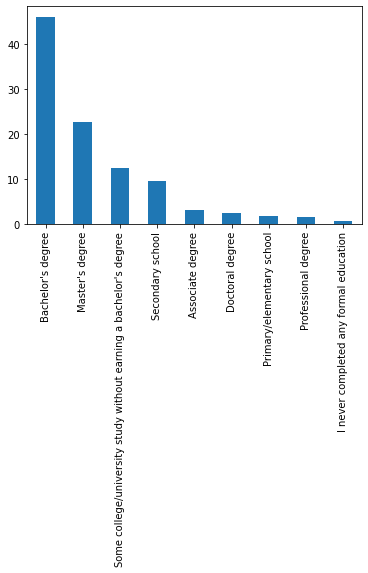

In [369]:
df2018_cleared = df2018['FormalEducation'].dropna()
df2018_cleared = df2018_cleared.value_counts()
df2018_cleared = df2018_cleared/df2018_cleared.sum()
df2018_cleared.rename(degree_mapping, inplace=True)
df2018_cleared.name = '2018'
df2018_cleared = df2018_cleared * 100
print(df2018_cleared)

df2018_cleared.plot(kind='bar')

Bachelor's degree                                                    45.299224
Master's degree                                                      22.651927
Some college/university study without earning a bachelor's degree    12.156500
Secondary school                                                     10.003473
Associate degree                                                      3.400857
Doctoral degree                                                       2.815141
Primary/elementary school                                             1.646024
Professional degree                                                   1.386735
I never completed any formal education                                0.640120
Name: 2019, dtype: float64


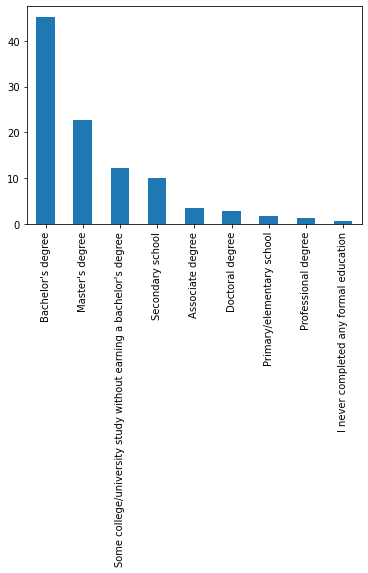

In [370]:
df2019_cleared = df2019['EdLevel'].dropna()
df2019_cleared = df2019_cleared.value_counts()
df2019_cleared = df2019_cleared/df2019_cleared.sum()
df2019_cleared.rename(degree_mapping, inplace=True)
df2019_cleared.name = '2019'
df2019_cleared = df2019_cleared * 100
print(df2019_cleared)

df2019_cleared.plot(kind='bar')

Bachelor's degree                                                    46.215459
Master's degree                                                      22.830875
Some college/university study without earning a bachelor's degree    12.604691
Secondary school                                                      8.307360
Associate degree                                                      3.209068
Doctoral degree                                                       2.942662
Primary/elementary school                                             1.638488
Professional degree                                                   1.392976
I never completed any formal education                                0.858421
Name: 2020, dtype: float64


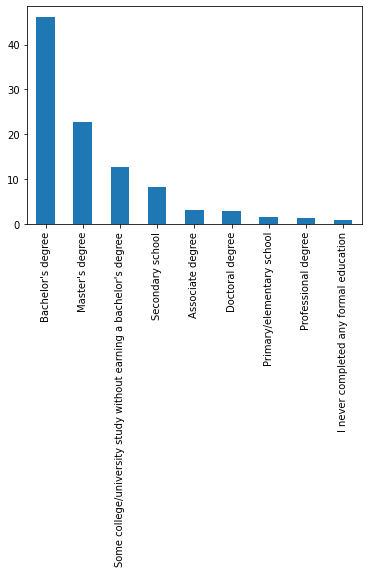

In [371]:
df2020_cleared = df2020['EdLevel'].dropna()
df2020_cleared = df2020_cleared.value_counts()
df2020_cleared = df2020_cleared/df2020_cleared.sum()
df2020_cleared.rename(degree_mapping, inplace=True)
df2020_cleared.name = '2020'
df2020_cleared = df2020_cleared * 100
print(df2020_cleared)

df2020_cleared.plot(kind='bar')

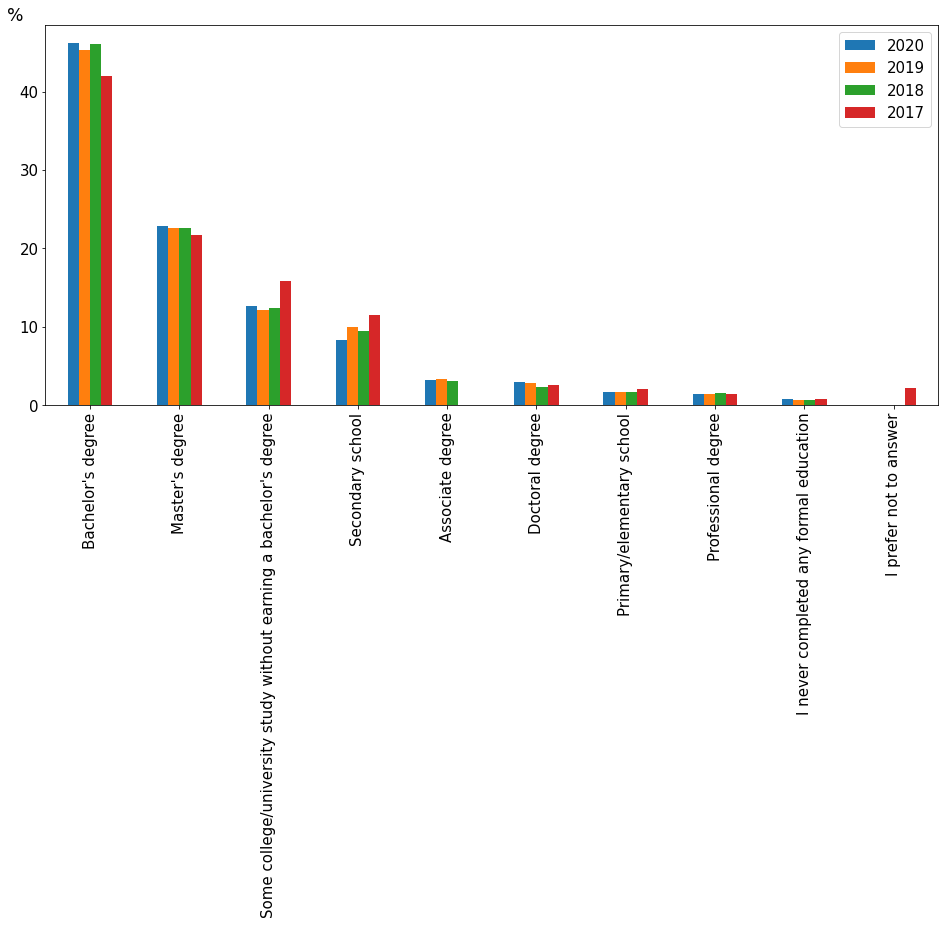

In [372]:
df = pd.concat([df2020_cleared, df2019_cleared, df2018_cleared, df2017_cleared], axis=1)
ax = df.plot(kind='bar', figsize=(16,7), fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')
ax.legend(fontsize=15)

##### Conclusion:
The distribution is almost identical for last 4 years.

### Salary changes 2014-2020
The objective is to discover how the salaries of people working in IT changed in recent 7 years.

In [373]:
set(df2014['Including bonus, what is your annual compensation in USD?'].values)

{'$100,000 - $120,000',
 '$120,000 - $140,000',
 '$20,000 - $40,000',
 '$40,000 - $60,000',
 '$60,000 - $80,000',
 '$80,000 - $100,000',
 '<$20,000',
 '>$140,000',
 'Rather not say',
 'Response',
 'Student / Unemployed',
 nan}

In [374]:
def salary_convertor2014(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    if sal == '$100,000 - $120,000':
        return 110000
    if sal == '$120,000 - $140,000':
        return 130000
    if sal == '$20,000 - $40,000':
        return 30000
    if sal == '$40,000 - $60,000':
        return 50000
    if sal == '$60,000 - $80,000':
        return 70000
    if sal == '$80,000 - $100,000':
        return 90000
    if sal == '<$20,000':
        return 10000
    if sal == '>$140,000':
        return 150000
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Response':
        return np.nan
    if sal == 'Student / Unemployed':
        return np.nan

sal2014 = df2014['Including bonus, what is your annual compensation in USD?']
sal2014 = sal2014.map(salary_convertor2014, na_action='ignore').mean()
sal2014

60205.49426779148

In [375]:
def salary_convertor2015(sal):
    '''
        Performs convertion from salary ranges to mean values.
        Non-numeric responses are mapped to NaN.
        
        INPUT - a pandas series with salary ranges
    '''
    
    if sal == 'Rather not say':
        return np.nan
    if sal == 'Unemployed':
        return np.nan
    else:
        return int(sal)
    
    
sal2015 = df2015['Compensation: midpoint'].map(salary_convertor2015, na_action='ignore').mean()
sal2015

54652.35242646564

In [376]:
sal2016 = df2016['salary_midpoint'].mean()

In [377]:
sal2017 = df2017['Salary'].mean()

In [378]:
sal2018 = df2018['ConvertedSalary'].mean()

In [379]:
sal2019 = df2019['ConvertedComp'].mean()

In [380]:
sal2020 = df2020['ConvertedComp'].mean()

In [381]:
sal_df = pd.Series([sal2014, sal2015, sal2016, sal2017, sal2018, sal2019, sal2020], index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])
sal_df

2014     60205.494268
2015     54652.352426
2016     53952.973025
2017     56298.480641
2018     95780.861788
2019    127110.738423
2020    103756.050150
dtype: float64

Text(0, 1, '$')

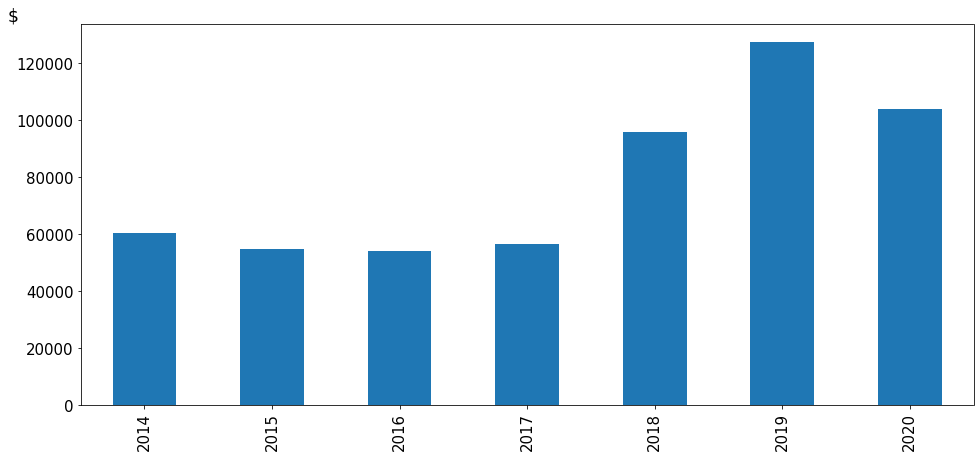

In [382]:
ax = sal_df.plot(kind='bar', figsize=(16,7), fontsize=15)
ax.set_ylabel(ylabel="$", fontsize='xx-large', position=(0,1), rotation='horizontal')

##### Conclusion:
In the first 4 years the salaries were approximately on the same level. Starting from 2018, there is a major raise in salaries with it's peak in 2019.

### Languages popularity 2014-2020
The objective is to discover which programming languages were popular in the last 7 years.

In [383]:
set_of_languages = {'C', 'C++', 'C++11', 'C#', 'Java', 'JavaScript', 'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL',
                    'CoffeeScript', 'Clojure', 'Dart', 'F#', 'Go', 'Haskell', 'Matlab', 'Perl', 'R', 'Rust', 'Scala', 
                    'Swift', 'Visual Basic', 'Other'}

def filter_languages(ser, set_of_lang):
    '''
    INPUT
        series - a pandas series which may contain languages and other tech
        set_of_lang - a list of programming languages
    OUTPUT
        filtered_ser - a pandas series which contains only languages
    '''
    filtered_ser = ser
    for idx in filtered_ser.index:
        if idx not in set_of_lang:
            filtered_ser.drop(idx, inplace=True)
    return filtered_ser

##### Languages 2014

In [384]:
lang2014 = df2014.loc[:,'Which of the following languages or technologies have you used significantly in the past year?':
                        'Which technologies are you excited about?']
lang2014 = lang2014.drop('Which technologies are you excited about?', axis=1)
lang2014.columns = lang2014.iloc[0]
lang2014 = lang2014.iloc[1:]
lang2014 = lang2014.count()
lang2014.name = 2014
idx = lang2014.index
new_idx = list(idx)
new_idx[-1] = 'Other'
lang2014.index = new_idx
lang2014 = filter_languages(lang2014, set_of_languages) #List of languages included a framework so needed filtering
lang2014 = lang2014 / lang2014.sum()
lang2014


C              0.057135
C++            0.069009
C#             0.115729
Java           0.120644
JavaScript     0.184106
Objective-C    0.032850
PHP            0.083220
Python         0.071686
Ruby           0.028859
SQL            0.168727
Other          0.068036
Name: 2014, dtype: float64

##### Languages 2015

In [385]:
lang2015 = df2015.loc[:,'Current Lang & Tech: Android':'Current Lang & Tech: Write-In']
lang2015 = lang2015.count()
idx = list(lang2015.index) #Editing index to make it uniform with previous data
for i in range(len(idx)):
    colon_pos = idx[i].find(':')
    idx[i] = idx[i][colon_pos+2:]
idx[-1] = 'Other'
lang2015.index = idx
lang2015 = filter_languages(lang2015, set_of_languages) #List of languages included other technologies so needed filtering
lang2015 = lang2015 / lang2015.sum()
lang2015.name = '2015'
lang2015

C               0.050535
C++             0.063365
C++11           0.025897
C#              0.097223
CoffeeScript    0.010955
Clojure         0.002462
Dart            0.001525
F#              0.002434
Go              0.006464
Haskell         0.004995
Java            0.114991
JavaScript      0.167359
Matlab          0.012032
Objective-C     0.024050
Perl            0.010325
PHP             0.091347
Python          0.073284
R               0.010563
Ruby            0.024694
Rust            0.001441
Scala           0.007527
SQL             0.132060
Swift           0.010619
Visual Basic    0.023799
Other           0.030052
Name: 2015, dtype: float64

##### Languages 2016

In [386]:
def separate_items(series, delimiter, dtype='object'):
    '''
    INPUT
        series - a pandas series with values to separate
        delimiter - a token that separates values
        dtype - a dtype of values 
    OUTPUT
        separated_ser - a pandas series with separated values
    '''

    separated_ser = pd.Series(np.nan, index=range(len(series)), dtype=dtype)
    for i in range(len(separated_ser)):
        if series[i] is not np.nan:
            separated_ser[i] = series[i].split(delimiter)
        else:
            separated_ser[i] = series[i]
    separated_ser.dropna(inplace=True)
    return separated_ser

            
temp2016 = df2016['tech_do'] 
lang2016 = separate_items(temp2016, "; ")
lang2016

1                                       [iOS, Objective-C]
6        [Android, Arduino / Raspberry Pi, AngularJS, C...
7                        [JavaScript, PHP, SQL, WordPress]
9                                                    [PHP]
10       [Arduino / Raspberry Pi, C, C++, Java, JavaScr...
                               ...                        
56020                            [C++, JavaScript, Python]
56022    [Arduino / Raspberry Pi, AngularJS, CoffeeScri...
56024                     [Android, C, C++, C#, Java, SQL]
56026     [Arduino / Raspberry Pi, C, Java, Python, Swift]
56029    [Arduino / Raspberry Pi, AngularJS, JavaScript...
Length: 49025, dtype: object

In [387]:
def count_values(series):
    '''
    INPUT
        series - a pandas series with lists of objects
    OUTPUT
        possible_values - a set of all unique values in the given series
    '''
    possible_values = set()
    for item in series.values:
        possible_values = possible_values.union(set(item))

    series_count = pd.Series(0, index=possible_values, dtype='int')
    for item in series.values:
        for lang in item:
            series_count[lang] = series_count[lang] + 1
    return series_count

lang2016_count = count_values(lang2016)
lang2016_count

LAMP                              4821
SQL Server                        9306
SharePoint                         853
Windows Phone                     1123
C#                               15283
CoffeeScript                      1662
Objective-C                       3202
Haskell                            813
Cassandra                          663
C                                 7678
Spark                              707
Salesforce                         665
Redis                             2862
Android                           8601
Python                           12282
Arduino / Raspberry Pi            3797
WordPress                         4496
Java                             17942
Scala                             1602
SQL                              21976
Hadoop                            1012
R                                 1632
Ruby                              4383
Matlab                            1602
Dart                               222
Go                       

In [388]:
#Some extra work to make data uniform

lang2016 = lang2016_count
lang2016 = filter_languages(lang2016, set_of_languages) #List of languages included other technologies so needed filtering
lang2016 = lang2016 / lang2016.sum()
lang2016.name = '2016'
lang2016

C#              0.101388
CoffeeScript    0.011026
Objective-C     0.021242
Haskell         0.005393
C               0.050936
Python          0.081479
Java            0.119028
Scala           0.010628
SQL             0.145789
R               0.010827
Ruby            0.029077
Matlab          0.010628
Dart            0.001473
Go              0.010263
JavaScript      0.181673
F#              0.003211
Rust            0.002892
Visual Basic    0.021972
Clojure         0.003689
PHP             0.084783
C++             0.063614
Swift           0.018217
Perl            0.010774
Name: 2016, dtype: float64

##### 2017 languages

In [389]:
def assemble_list_of_technologies(df, fields, delim):
    '''
    INPUT
        df - a dataframe from which to extract values
        fields - a list of column names in df that denote languages, frameworks, databases, platforms and other
        technologies worked with in the given year
        delim - delimeter that separates values in each column
    OUTPUT
        result - a pandas series with languages, frameworks, databases and platforms as index and the count of users as values
    '''

    result = pd.Series(dtype='int')
    
    for field in fields:
        tech = df[field]
        tech = separate_items(tech, delim)
        tech = count_values(tech)
        result = result.append(tech)
        
    return result
    
   


In [390]:
lang2017 = assemble_list_of_technologies(df2017, ['HaveWorkedLanguage'], "; ")

In [391]:
#Some extra work to make this data uniform with the previous years
lang2017.rename({"Visual Basic 6": "Visual Basic"}, inplace=True)
lang2017 = lang2017 / lang2017.sum()
lang2017.name = 2017
lang2017

C#              0.089973
CoffeeScript    0.008596
Visual Basic    0.007724
Julia           0.000995
Haskell         0.004680
Objective-C     0.016940
VB.NET          0.016392
C               0.050294
Lua             0.007493
Python          0.084405
Elixir          0.002740
TypeScript      0.025154
Groovy          0.008604
Java            0.104742
Erlang          0.002026
Scala           0.009440
SQL             0.135248
VBA             0.011351
Ruby            0.023972
R               0.011784
Assembly        0.013147
Matlab          0.011315
Dart            0.001046
Go              0.011229
JavaScript      0.164967
F#              0.003296
Rust            0.003000
Clojure         0.002820
PHP             0.074208
C++             0.058811
Smalltalk       0.002358
Swift           0.017077
Common Lisp     0.001969
Hack            0.000772
Perl            0.011431
Name: 2017, dtype: float64

##### Languages 2018

In [392]:
lang2018 = assemble_list_of_technologies(df2018, ['LanguageWorkedWith'], ";")

In [393]:
lang2018

CSS                     50979
C#                      26954
CoffeeScript             2603
Ocaml                     470
Julia                     430
Visual Basic 6           3087
Objective-C              5510
VB.NET                   5254
Haskell                  1961
C                       18042
Lua                      2733
Delphi/Object Pascal     2025
Python                  30359
Kotlin                   3508
TypeScript              13626
Bash/Shell              31172
Groovy                   3373
Java                    35521
Erlang                    886
Scala                    3420
SQL                     44670
VBA                      3810
R                        4813
Ruby                     7911
Assembly                 5760
Matlab                   4564
Go                       5532
JavaScript              54686
F#                       1115
Rust                     1857
Clojure                  1032
PHP                     24071
C++                     19872
Cobol     

In [394]:
#Some extra work to make this data uniform with the previous years
lang2018['HTML'] = lang2018['HTML'] + lang2018['CSS']
lang2018.drop('CSS', inplace=True)
lang2018.rename({"Visual Basic 6": "Visual Basic"}, inplace=True)
lang2018.rename({"HTML": "HTML/CSS"}, inplace=True)
lang2018 = lang2018 / lang2018.sum()
lang2018.name = 2018
lang2018

C#                      0.055499
CoffeeScript            0.005360
Ocaml                   0.000968
Julia                   0.000885
Visual Basic            0.006356
Objective-C             0.011345
VB.NET                  0.010818
Haskell                 0.004038
C                       0.037149
Lua                     0.005627
Delphi/Object Pascal    0.004170
Python                  0.062510
Kotlin                  0.007223
TypeScript              0.028056
Bash/Shell              0.064184
Groovy                  0.006945
Java                    0.073138
Erlang                  0.001824
Scala                   0.007042
SQL                     0.091976
VBA                     0.007845
R                       0.009910
Ruby                    0.016289
Assembly                0.011860
Matlab                  0.009397
Go                      0.011390
JavaScript              0.112600
F#                      0.002296
Rust                    0.003824
Clojure                 0.002125
PHP       

##### Languages 2019

In [395]:
lang2019 = assemble_list_of_technologies(df2019, ['LanguageWorkedWith'], ";")

In [396]:
lang2019

Java                     35917
VBA                       4781
Erlang                     777
SQL                      47544
Bash/Shell/PowerShell    31991
Scala                     3309
R                         5048
Ruby                      7331
Assembly                  5833
Dart                      1683
Go                        7201
JavaScript               59219
C#                       27097
F#                         973
Rust                      2794
WebAssembly               1015
Objective-C               4191
Clojure                   1254
C                        18017
PHP                      23030
C++                      20524
Swift                     5744
Other(s):                 7920
Python                   36443
HTML/CSS                 55466
Kotlin                    5620
Elixir                    1260
TypeScript               18523
dtype: int32

In [397]:
#Some extra work to make this data uniform with the previous years
lang2019.rename({"Other(s):": "Other"}, inplace=True)
lang2019.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)
lang2019 = lang2019 / lang2019.sum()
lang2019.name = 2019
lang2019

Java           0.081536
VBA            0.010853
Erlang         0.001764
SQL            0.107931
Bash/Shell     0.072623
Scala          0.007512
R              0.011460
Ruby           0.016642
Assembly       0.013242
Dart           0.003821
Go             0.016347
JavaScript     0.134434
C#             0.061513
F#             0.002209
Rust           0.006343
WebAssembly    0.002304
Objective-C    0.009514
Clojure        0.002847
C              0.040901
PHP            0.052281
C++            0.046592
Swift          0.013040
Other          0.017979
Python         0.082730
HTML/CSS       0.125915
Kotlin         0.012758
Elixir         0.002860
TypeScript     0.042049
Name: 2019, dtype: float64

##### Languages 2020

In [398]:
lang2020 = assemble_list_of_technologies(df2020, ['LanguageWorkedWith'], ";")

In [399]:
lang2020.rename({"Bash/Shell/PowerShell": "Bash/Shell"}, inplace=True)
lang2020 = lang2020 / lang2020.sum()
lang2020.name = 2020
lang2020

Java           0.080117
VBA            0.012149
Scala          0.007125
SQL            0.109071
Bash/Shell     0.065902
Ruby           0.014048
R              0.011417
Assembly       0.012337
Dart           0.007917
Go             0.017493
JavaScript     0.134797
C#             0.062641
Julia          0.001802
Rust           0.010170
Objective-C    0.008125
Haskell        0.004243
C              0.043357
PHP            0.052107
C++            0.047593
Swift          0.011795
Python         0.087801
HTML/CSS       0.125627
Kotlin         0.015514
TypeScript     0.050617
Perl           0.006236
Name: 2020, dtype: float64

##### Putting all together

In [400]:
lang_over_years = pd.concat([lang2014, lang2015, lang2016, lang2017, lang2018, lang2019, lang2020], axis=1)
lang_over_years.fillna(0, inplace=True)

In [401]:
lang_over_years.columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
lang_over_years

,2014,2015,2016,2017,2018,2019,2020
C,0.057135,0.050535,0.050936,0.050294,0.037149,0.040901,0.043357
C++,0.069009,0.063365,0.063614,0.058811,0.040917,0.046592,0.047593
C#,0.115729,0.097223,0.101388,0.089973,0.055499,0.061513,0.062641
Java,0.120644,0.114991,0.119028,0.104742,0.073138,0.081536,0.080117
JavaScript,0.184106,0.167359,0.181673,0.164967,0.112600,0.134434,0.134797
Objective-C,0.032850,0.024050,0.021242,0.016940,0.011345,0.009514,0.008125
PHP,0.083220,0.091347,0.084783,0.074208,0.049563,0.052281,0.052107
Python,0.071686,0.073284,0.081479,0.084405,0.062510,0.082730,0.087801
Ruby,0.028859,0.024694,0.029077,0.023972,0.016289,0.016642,0.014048
SQL,0.168727,0.132060,0.145789,0.135248,0.091976,0.107931,0.109071


In [402]:
lang_over_years.sort_values(by='2018', ascending=False, inplace=True) #sorting values for better presentation
#Divide the list into two parts for more convinient presentation
lang_over_years1 = lang_over_years.head(23)
lang_over_years2 = lang_over_years.tail(22)

Text(0, 1, '%')

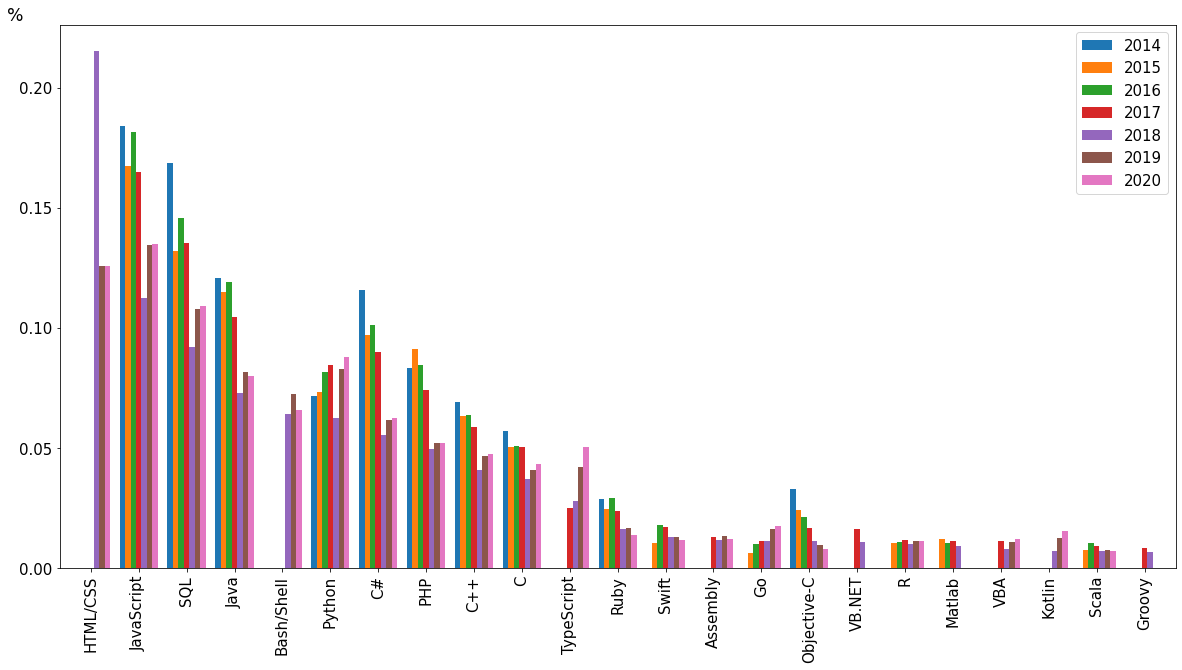

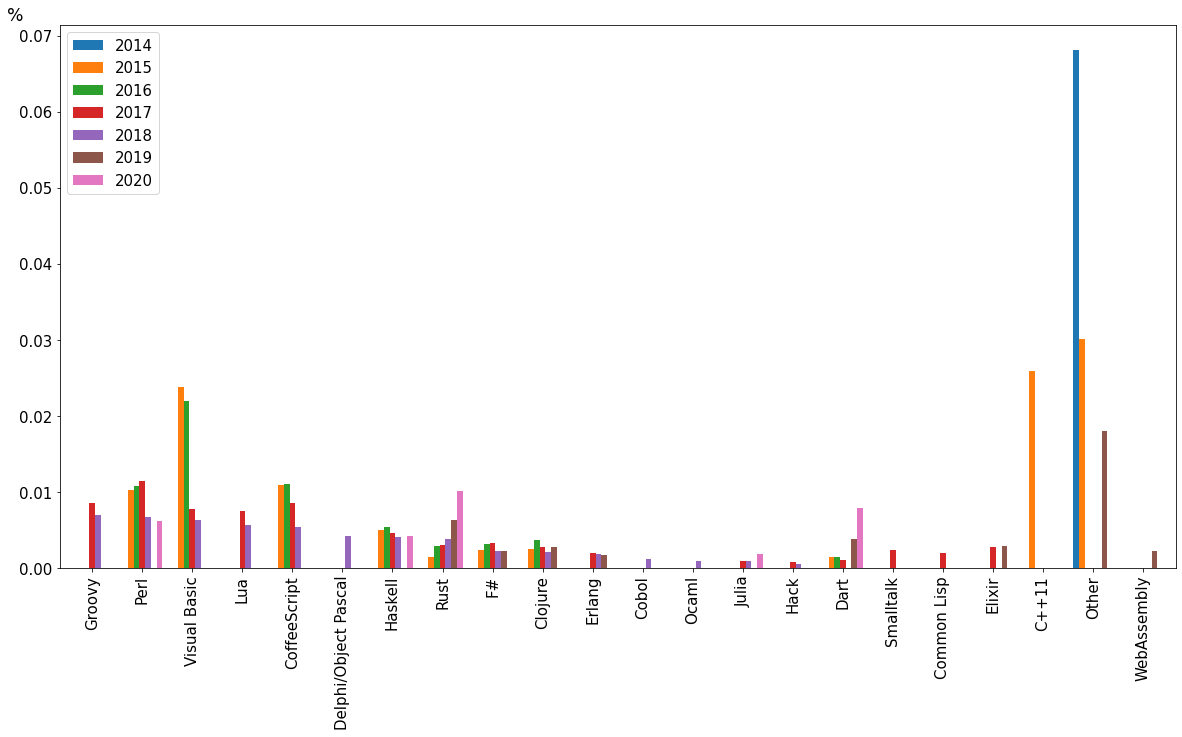

In [403]:
ax = lang_over_years1.plot(kind='bar', figsize=(20,10), width=0.8, fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')
ax = lang_over_years2.plot(kind='bar', figsize=(20,10), width=0.8, fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(ylabel="%", fontsize='xx-large', position=(0,1), rotation='horizontal')

##### Conclusion:
JavaScript is holding the leading position in all years (we don't count HTML/CSS as a programming lanuage). SQL is very popular, but it's not a general purpose language. The second place is shared (approximately) by Python and Java. C/C++/C# and PHP are also quite popular, but in the last 3 years it's decreasing. It's worth to mention that Bash/Shell scripting is also a frequently used skill.